### Name:- Pornima Puri

## LetsGrowMore Internship

# Task 1:- Iris flower Classification ML project

# Dataset information
The data set contain 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2

**Attribute information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:- Iris Setosa - Iris Versicolour - Iris Virginica

# Import Modules

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [5]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# to display number of samples on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the dataset

In [9]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

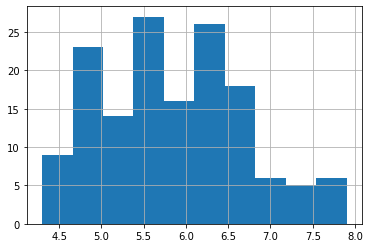

In [10]:
# Histograms
df['sepal_length'].hist()

<AxesSubplot:>

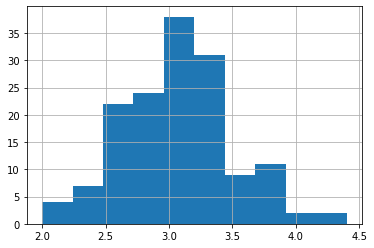

In [11]:
df['sepal_width'].hist()

<AxesSubplot:>

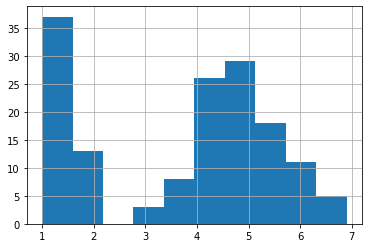

In [12]:
df['petal_length'].hist()

<AxesSubplot:>

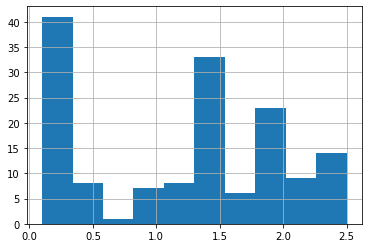

In [13]:
df['petal_width'].hist()

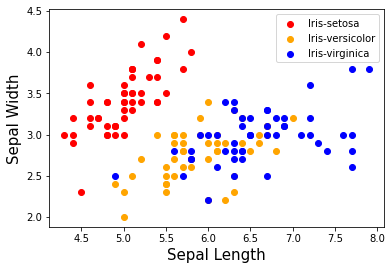

In [14]:
# Scatter plot
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length',size = 15)
plt.ylabel('Sepal Width', size = 15)
plt.legend()

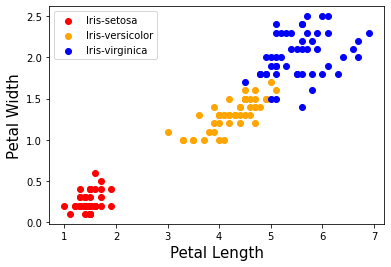

In [15]:
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c = colors[i], label=species[i])
plt.xlabel('Petal Length',size = 15)
plt.ylabel('Petal Width', size = 15)
plt.legend()

# Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [16]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

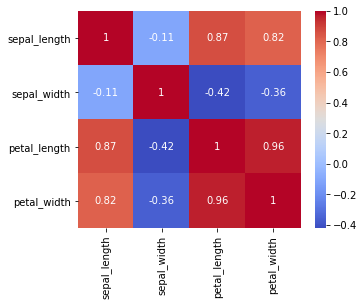

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

# Label Encoder
In machine learning , we usually deal with datasets which contains multiple labels in one or more than one columns. These lables can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [44]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [45]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
# model training
model.fit(x_train,y_train)

C:\Users\unique computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [48]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [49]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [51]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0
